###importing Neccesary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#reading the data
df=pd.read_csv('/content/all-data.csv',delimiter=',',encoding='latin-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


#renaming the columns

In [ ]:
df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'message'},inplace=True)

#understanding the data

In [ ]:
df.columns

Index(['sentiment', 'message'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   message    4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
df.shape

(4845, 2)

In [ ]:
df.isnull().sum()

,0
sentiment,0
message,0


#Visualizing the given Sentiment Data

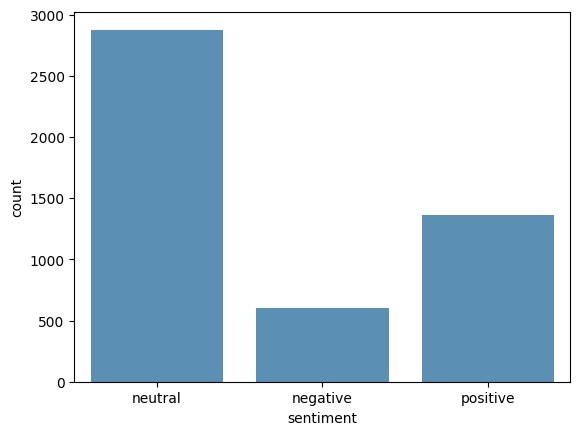

In [ ]:
plt.figure.figsize=(10,10)
sns.countplot(x='sentiment',data=df,alpha=0.8)
plt.show()

<Axes: ylabel='count'>

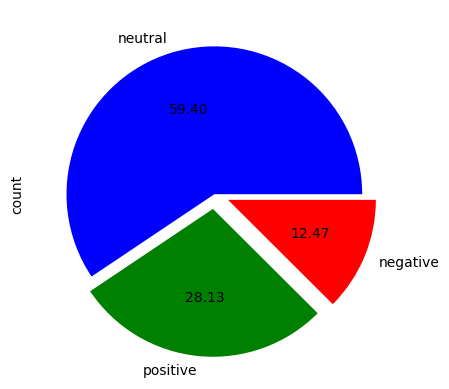

In [ ]:
#pie chart
expl=[0,0.1,0.1]
df['sentiment'].value_counts().plot(kind='pie',autopct='%.2f',explode=expl,colors=['blue','green','red'])

Here 59.4% of data is neutral and 29.1% positive and 12.5% negative

#Cleaning the data

In [ ]:
# Defining a function that integrates lowercasing, special character removal, and placeholder handling and html tags
def preprocess(reviewedtext):
    reviewedtext = reviewedtext.str.replace("(<br/>)", "")
    reviewedtext = reviewedtext.str.replace('(<a).*(>).*(</a>)', '')
    reviewedtext = reviewedtext.str.replace('(&amp)', '')
    reviewedtext = reviewedtext.str.replace('(&gt)', '')
    reviewedtext = reviewedtext.str.replace('(&lt)', '')
    reviewedtext = reviewedtext.str.replace('(\xa0)', ' ')
    return reviewedtext
# Placing a new column in the dataframe after cleaning the message column
df['review_message'] = preprocess(df['message'])
df.review_message=df.review_message.str.lower()
df['message_length'] = df['review_message'].astype(str).apply(len)
df['word_count'] = df['review_message'].apply(lambda x: len(str(x).split()))
df.head()

,sentiment,message,review_message,message_length,word_count
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,190,31
1,negative,The international electronic industry company ...,the international electronic industry company ...,228,36
2,positive,With the new production plant the company woul...,with the new production plant the company woul...,206,33
3,positive,According to the company 's updated strategy f...,according to the company 's updated strategy f...,203,41
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing of aspocomp 's growth aspocomp is ag...,178,25


# neccesary libraries for stopwords and lemmatizer

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Tokenization:
Breaking text into smaller units called tokens (words or phrases) to facilitate analysis

In [ ]:
df['review_message']=df['review_message'].apply(nltk.word_tokenize)

#Stopwords Removal:
Eliminating common words (stopwords) that carry little semantic meaning to focus on more meaningful content.


In [ ]:
stop_words = set(stopwords.words('english'))
df['review_message'] = df['review_message'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,sentiment,message,review_message,message_length,word_count
0,neutral,Technopolis plans to develop in stages an area...,"[technopolis, plans, develop, stages, area, le...",190,31
1,negative,The international electronic industry company ...,"[international, electronic, industry, company,...",228,36
2,positive,With the new production plant the company woul...,"[new, production, plant, company, would, incre...",206,33
3,positive,According to the company 's updated strategy f...,"[according, company, 's, updated, strategy, ye...",203,41
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,"[financing, aspocomp, 's, growth, aspocomp, ag...",178,25


#Lemmatization:
Similar to stemming but focuses on reducing words to their dictionary form (lemma).

In [ ]:
#applying lemmatizer after tokenization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
#applying lemmatization
df['review_message'] = df['review_message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

,sentiment,message,review_message,message_length,word_count
0,neutral,Technopolis plans to develop in stages an area...,"[technopolis, plan, develop, stage, area, le, ...",190,31
1,negative,The international electronic industry company ...,"[international, electronic, industry, company,...",228,36
2,positive,With the new production plant the company woul...,"[new, production, plant, company, would, incre...",206,33
3,positive,According to the company 's updated strategy f...,"[according, company, 's, updated, strategy, ye...",203,41
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,"[financing, aspocomp, 's, growth, aspocomp, ag...",178,25


#Polarity
It is the process of determining the overall sentiment of a text, phrase, or word.

In [ ]:
#finding the polarity
import textblob
from textblob import TextBlob

In [ ]:
#inserting a new column that calculates the polarity of each column data
df['polarity'] = df['review_message'].map(lambda text: TextBlob(' '.join(text)).sentiment.polarity)
df.head()

,sentiment,message,review_message,message_length,word_count,polarity
0,neutral,Technopolis plans to develop in stages an area...,"[technopolis, plan, develop, stage, area, le, ...",190,31,0.000000
1,negative,The international electronic industry company ...,"[international, electronic, industry, company,...",228,36,-0.160000
2,positive,With the new production plant the company woul...,"[new, production, plant, company, would, incre...",206,33,-0.064802
3,positive,According to the company 's updated strategy f...,"[according, company, 's, updated, strategy, ye...",203,41,0.000000
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,"[financing, aspocomp, 's, growth, aspocomp, ag...",178,25,0.000000


#Visualizing the polarity Sentiment data

In [ ]:
positve_sentiment=df[df["polarity"]>0].count()["sentiment"]
neutral_sentiment=df[df["polarity"]==0].count()["sentiment"]
negative_sentiment=df[df["polarity"]<0].count()["sentiment"]

Text(0.5, 1.0, 'Sentiment Analysis')

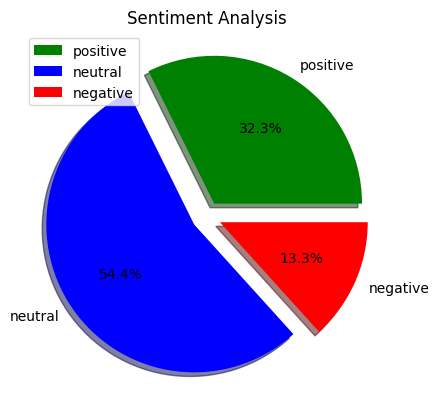

In [ ]:
sentiment=['positive','neutral','negative']
sentiment_count=[positve_sentiment,neutral_sentiment,negative_sentiment]
colors=['green','blue','red']
explode=[0.1,0.1,0.1]
plt.pie(sentiment_count,labels=sentiment,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%')
#legend postion top left
plt.legend(loc='upper left')
plt.title('Sentiment Analysis')

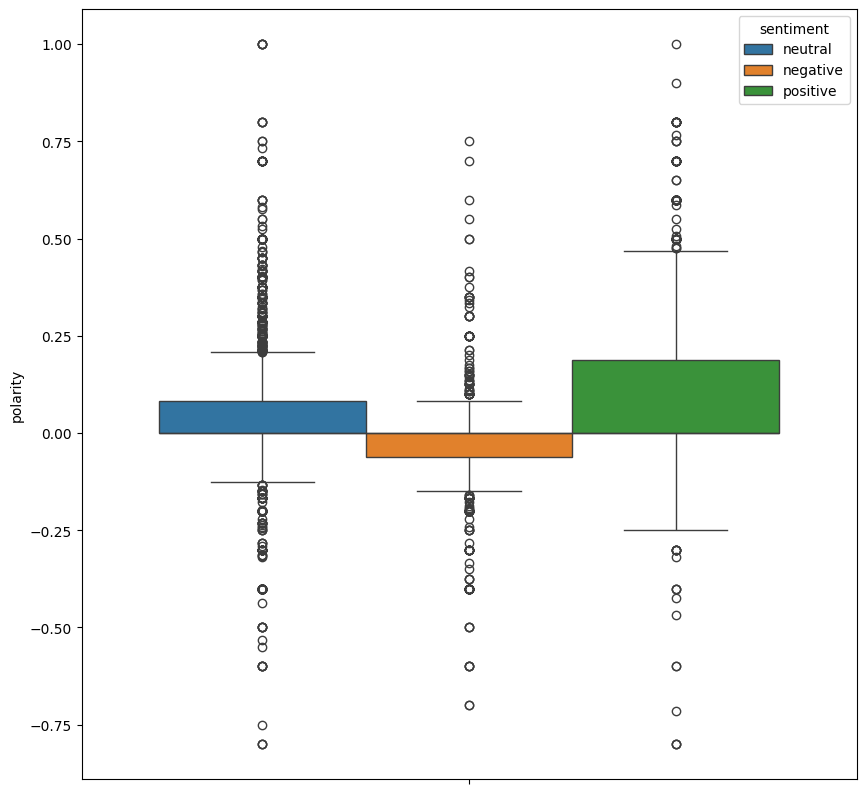

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y='polarity',hue='sentiment',data=df)
plt.show()

Here most of the data is neutral and and same kind of data is in positive also

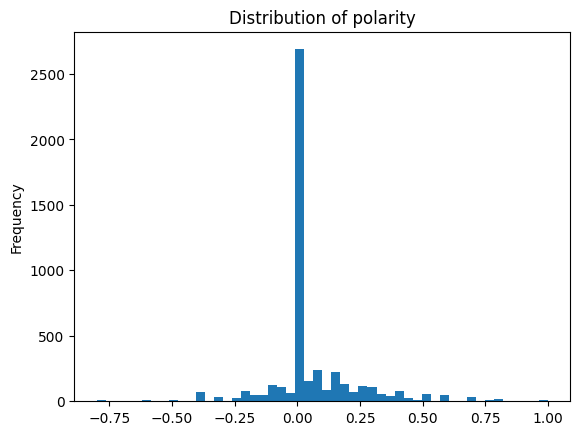

In [ ]:
#histogram
df['polarity'].plot(kind='hist',bins=50,title='Distribution of polarity')
plt.show()

#Most common words

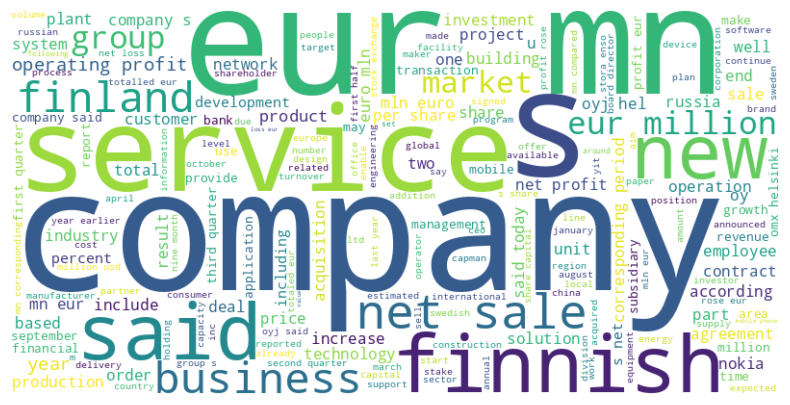

In [ ]:
from wordcloud import WordCloud

text_combined = ' '.join([' '.join(x) if isinstance(x,list) else x for x in df['review_message']])
#This line iterates through the column, checking if an element is a list. If it is, it joins the elements within the list into a single string.

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def generate_wordcloud_comparison(dfs, df, sentiment):
    # Generate text for the word cloud from both before (dfs) and after (df) removing stopwords
    sentiment_text_before = ' '.join(dfs[dfs['sentiment'] == sentiment]['message'])
    sentiment_text_after = ' '.join([' '.join(x) if isinstance(x, list) else x for x in df[df['sentiment'] == sentiment]['review_message']])


    # Create word clouds
    wordcloud_before = WordCloud(width=800, height=400, background_color='black').generate(sentiment_text_before)
    wordcloud_after = WordCloud(width=800, height=400, background_color='black').generate(sentiment_text_after)

    # Plot the word clouds side by side
    plt.figure(figsize=(20,10))

    # Word cloud before stopword removal
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_before, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment (Before Stopwords Removal)')

    # Word cloud after stopword removal
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_after, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment (After Stopwords Removal)')

    plt.show()

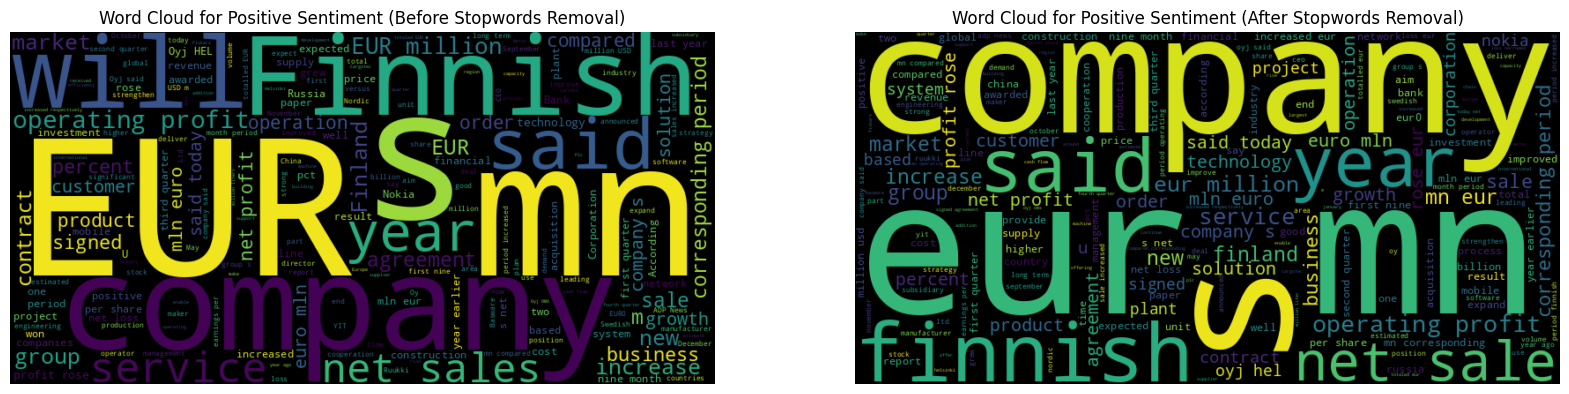

In [ ]:
generate_wordcloud_comparison(df, df, 'positive')

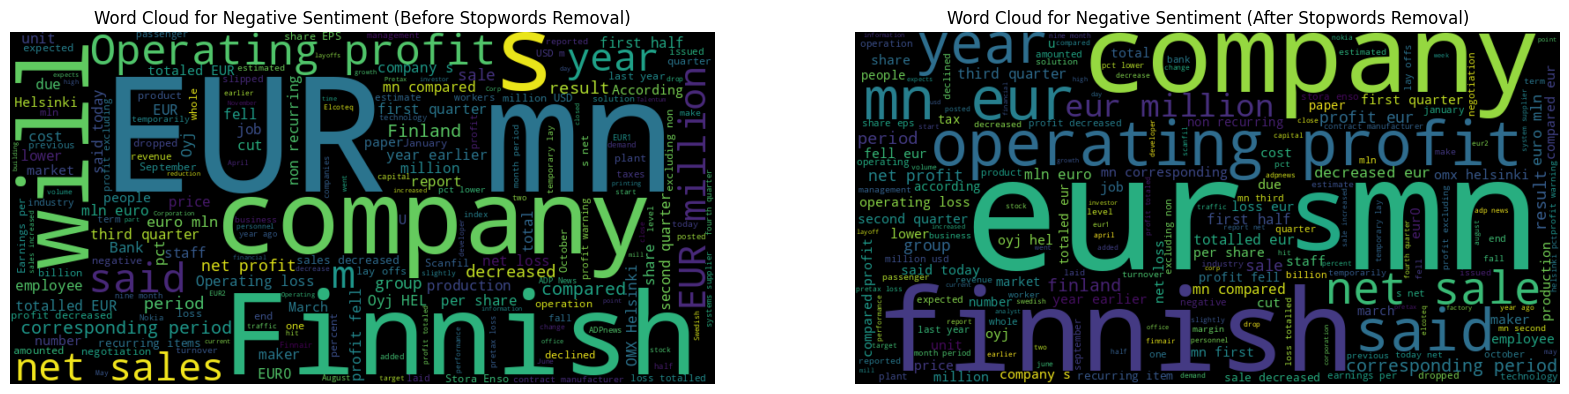

In [ ]:
generate_wordcloud_comparison(df, df, 'negative')

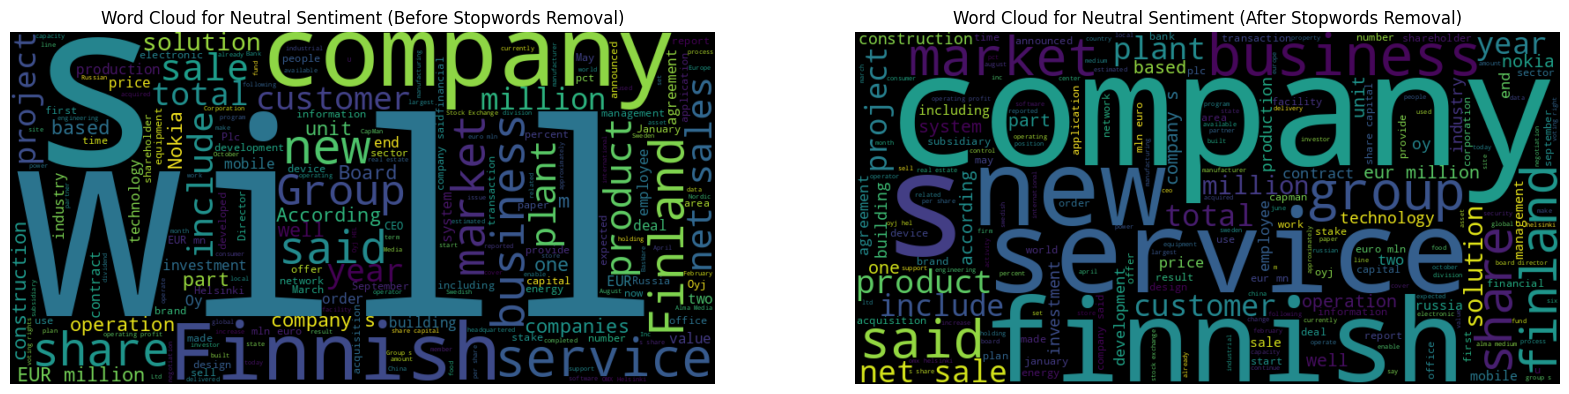

In [ ]:
generate_wordcloud_comparison(df, df, 'neutral')

#Bigram Visualization

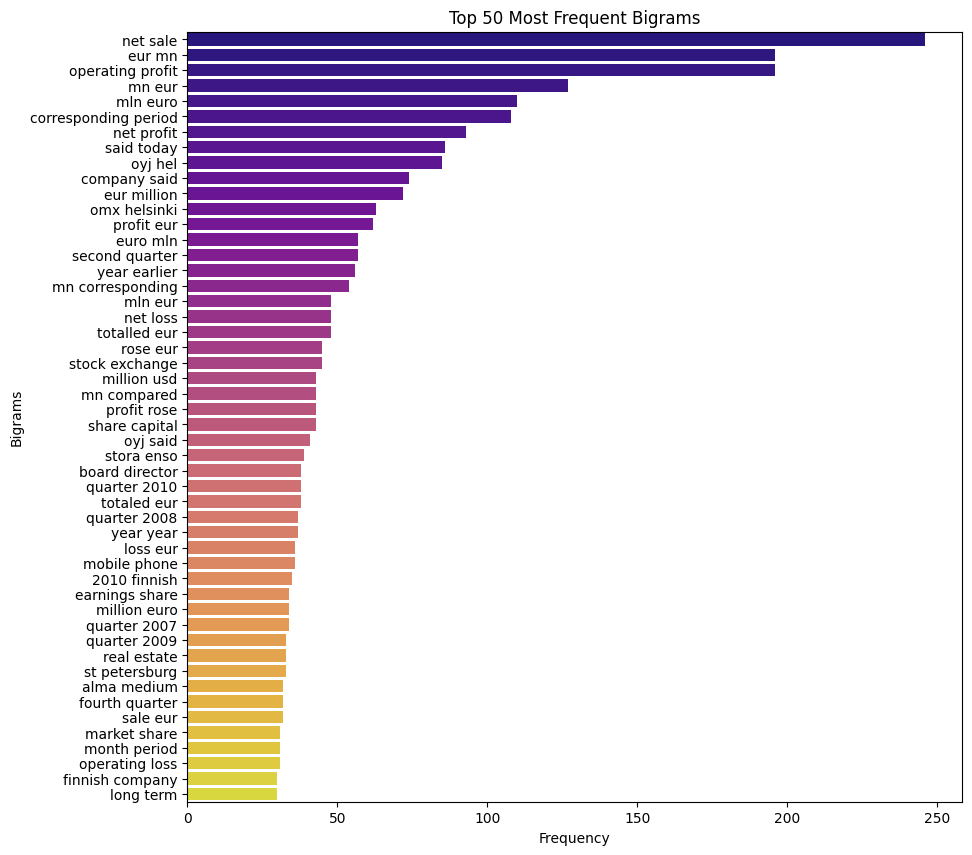

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def plot_top_ngrams(corpus, ngram_range=(2, 2), num_ngrams=50):
    # Convert lists of strings to strings
    corpus = [' '.join(x) if isinstance(x, list) else x for x in corpus]

    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()

    ngrams_df = pd.DataFrame({'ngram': ngram_names, 'count': ngram_counts})
    top_ngrams = ngrams_df.nlargest(num_ngrams, 'count')

    plt.figure(figsize=(10,10))
    sns.barplot(x='count', y='ngram', data=top_ngrams, palette='plasma')
    plt.title(f'Top {num_ngrams} Most Frequent Bigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()

corpus = df['review_message']
plot_top_ngrams(corpus, ngram_range=(2, 2))  # Bigrams

#Trigram Visualization

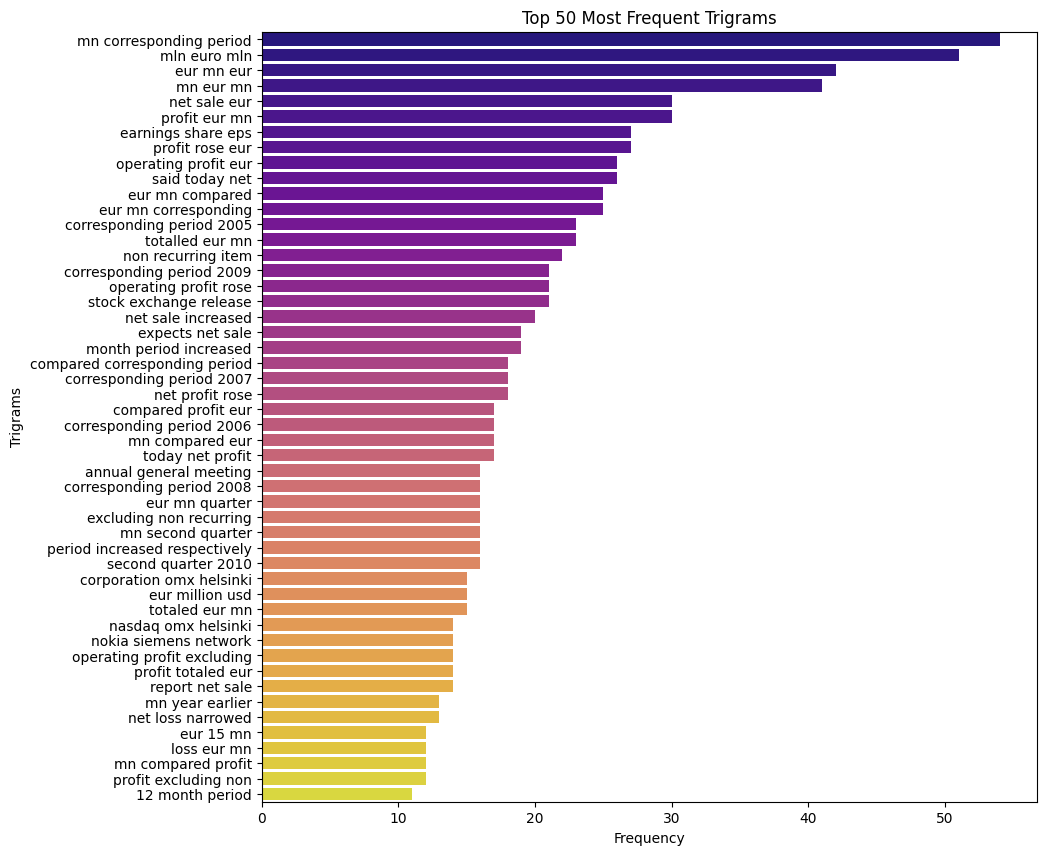

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def plot_top_ngrams(corpus, ngram_range=(3, 3), num_ngrams=50):
    # Convert lists of strings to strings
    corpus = [' '.join(x) if isinstance(x, list) else x for x in corpus]

    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()

    ngrams_df = pd.DataFrame({'ngram': ngram_names, 'count': ngram_counts})
    top_ngrams = ngrams_df.nlargest(num_ngrams, 'count')

    plt.figure(figsize=(10,10))
    sns.barplot(x='count', y='ngram', data=top_ngrams, palette='plasma')
    plt.title(f'Top {num_ngrams} Most Frequent Trigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Trigrams')
    plt.show()

corpus = df['review_message']
plot_top_ngrams(corpus, ngram_range=(3, 3))  # Trigrams

In [ ]:
df2=df.copy()

In [ ]:
#tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer(max_features=100, ngram_range =(2,2))
X_tfidf=tfidf.fit_transform(df2["review_message"].apply(lambda x: ' '.join(x))).toarray()
tfidf_df=pd.DataFrame(X_tfidf,columns=tfidf.get_feature_names_out())
tfidf_df.head()

,000 euro,000 tonne,2009 finnish,2010 finnish,adp news,alma medium,baltic country,board director,business area,cash flow,...,stora enso,third quarter,today net,totaled eur,totalled eur,upm kymmene,voting right,year ago,year earlier,year on
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2['review_tfidf']=list(X_tfidf)
df2.head()

,sentiment,message,review_message,message_length,word_count,polarity,review_tfidf
0,neutral,Technopolis plans to develop in stages an area...,"[technopolis, plan, develop, stage, area, le, ...",190,31,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,negative,The international electronic industry company ...,"[international, electronic, industry, company,...",228,36,-0.160000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,positive,With the new production plant the company woul...,"[new, production, plant, company, would, incre...",206,33,-0.064802,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,positive,According to the company 's updated strategy f...,"[according, company, 's, updated, strategy, ye...",203,41,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,"[financing, aspocomp, 's, growth, aspocomp, ag...",178,25,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


#Word 2 vec

In [ ]:
import gensim
from gensim.models import Word2Vec
w2v_model=gensim.models.Word2Vec(df2['review_message'],
                             vector_size=100,
                             window=5,
                             min_count=1,
                             workers=5)

In [ ]:
w2v_model.build_vocab(df2['review_message'],progress_per=1000)

In [ ]:
w2v_model.train(df2['review_message'],total_examples=w2v_model.corpus_count,epochs=10)

(640891, 778340)

In [ ]:
w2v_model.wv.most_similar('sale')

[('increased', 0.966422975063324),
 ('third', 0.9605451822280884),
 ('income', 0.9603744149208069),
 ('meur', 0.9577239751815796),
 ('eur4', 0.9574396014213562),
 ('.9', 0.9568925499916077),
 ('eur20m', 0.9563717842102051),
 ('second', 0.9562575221061707),
 ('decreased', 0.9547839760780334),
 ('totalled', 0.954338014125824)]

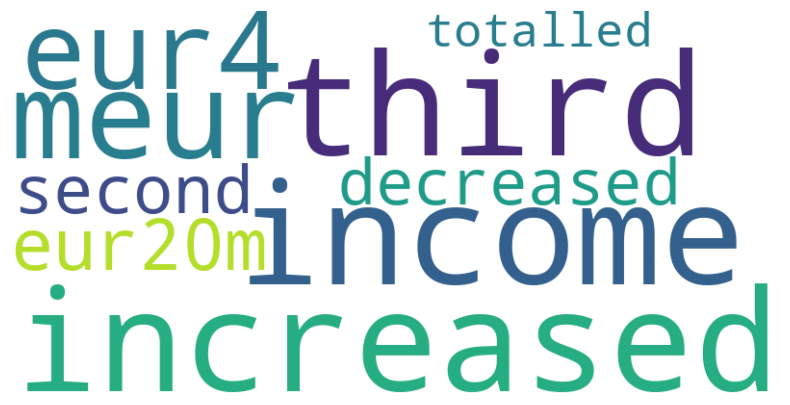

In [ ]:
#wordcloud
similar_words=dict(w2v_model.wv.most_similar('sale'))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(similar_words.keys()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np

# Defining a Function to vectorize a single sentence using the trained Word2Vec model
def vectorize_sentence(sentence, model):
    word_vectors = []

    for word in sentence:
        if word in model.wv:
            word_vectors.append(model.wv[word])

    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Apply the vectorize_sentence function to each row in the DataFrame
df2['review_w2v'] = df2['review_message'].apply(lambda sentence: vectorize_sentence(sentence, w2v_model))

In [ ]:
df2.head()

,sentiment,message,review_message,message_length,word_count,polarity,review_tfidf,review_w2v
0,neutral,Technopolis plans to develop in stages an area...,"[technopolis, plan, develop, stage, area, le, ...",190,31,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.23381202, 0.64440775, 0.443796, 0.166886, ..."
1,negative,The international electronic industry company ...,"[international, electronic, industry, company,...",228,36,-0.160000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.23490112, 0.5661203, 0.41171038, 0.1799991..."
2,positive,With the new production plant the company woul...,"[new, production, plant, company, would, incre...",206,33,-0.064802,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.30087304, 0.48907313, 0.41306618, 0.081761..."
3,positive,According to the company 's updated strategy f...,"[according, company, 's, updated, strategy, ye...",203,41,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.37277663, 0.29749757, 0.34382236, 0.015273..."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,"[financing, aspocomp, 's, growth, aspocomp, ag...",178,25,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.21985546, 0.48814347, 0.34216484, 0.090228..."


In [ ]:
#doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# Convert lists to strings before splitting
train_corpus = [TaggedDocument(words=doc if isinstance(doc, str) else ' '.join(doc), tags=[str(i)]) for i, doc in enumerate(df2['review_message'])]
doc2vec_model=Doc2Vec(vector_size=100, window=5, min_count=1, workers=4) # Initialize a Doc2Vec model
doc2vec_model.build_vocab(train_corpus) # Build vocabulary from the training corpus
doc2vec_model.train(train_corpus, total_examples=doc2vec_model.corpus_count, epochs=10)
def doc2vec_preprocessor(text):
    if isinstance(text, str):
        doc_vector = doc2vec_model.infer_vector(text.split()) # Get the document vector from Doc2Vec
    else:
        doc_vector = doc2vec_model.infer_vector(text)
    return doc_vector # Convert the vector to a string and return
df2['review_d2v']=df2['review_message'].apply(doc2vec_preprocessor)

In [ ]:
df2.head()

,sentiment,message,review_message,message_length,word_count,polarity,review_tfidf,review_w2v,review_d2v
0,neutral,Technopolis plans to develop in stages an area...,"[technopolis, plan, develop, stage, area, le, ...",190,31,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.23381202, 0.64440775, 0.443796, 0.166886, ...","[0.00044335873, 0.06318246, 0.04533864, -0.011..."
1,negative,The international electronic industry company ...,"[international, electronic, industry, company,...",228,36,-0.160000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.23490112, 0.5661203, 0.41171038, 0.1799991...","[-0.0026928934, 0.0899871, 0.08131375, -0.0151..."
2,positive,With the new production plant the company woul...,"[new, production, plant, company, would, incre...",206,33,-0.064802,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.30087304, 0.48907313, 0.41306618, 0.081761...","[-0.0021927073, 0.038792804, 0.036697123, -0.0..."
3,positive,According to the company 's updated strategy f...,"[according, company, 's, updated, strategy, ye...",203,41,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.37277663, 0.29749757, 0.34382236, 0.015273...","[-0.008224663, 0.15262298, 0.14061254, -0.0519..."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,"[financing, aspocomp, 's, growth, aspocomp, ag...",178,25,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.21985546, 0.48814347, 0.34216484, 0.090228...","[-0.0045417235, 0.054164425, 0.04855072, -0.00..."


In [ ]:
y=df2['sentiment']
y.head()

,sentiment
0,neutral
1,negative
2,positive
3,positive
4,positive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train_w2v,X_test_w2v,y_train_w2v,y_test_w2v=train_test_split(np.stack(df2['review_w2v'].to_numpy()),y,test_size=0.20)

In [ ]:
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf=train_test_split(np.stack(df2['review_tfidf'].to_numpy()),y,test_size=0.20)

In [ ]:
X_train_d2v,X_test_d2v,y_train_d2v,y_test_d2v=train_test_split(np.stack(df2['review_d2v'].to_numpy()),y,test_size=0.20)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,ShuffleSplit
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#svm
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    if y.ndim == 2 and y.shape[1] > 1:
        y = np.argmax(y, axis=1)

    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=2000),
            'parameters': {
                'C': [1,5,10]
               }
        },

        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [100,200]
            }
        },

        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10],
                'kernel': ['linear']
            }
        }

    }
    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)

        if isinstance(X[0][0], str):
            X = np.array([[float(val) for val in row] for row in X])

        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

In [ ]:
find_best_model(X_train_tfidf, y_train_tfidf)

KeyboardInterrupt: 

In [ ]:
find_best_model(X_train_w2v, y_train_w2v)

In [ ]:
find_best_model(X_train_d2v, y_train_d2v)

# After comparing threee vectorizers we came to know that tfiidf working better than others and having good acuracy in logistic regression

In [ ]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores_tfidf = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train_tfidf, y_train_tfidf, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores_tfidf)*100/len(scores_tfidf)), 3))

Average Accuracy : 66%


#Model Evaluation


In [ ]:
# Creating Random Forest Model
classifier_tfidf = RandomForestClassifier(criterion='gini',n_estimators=100)
classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

RandomForestClassifier()

In [ ]:
# Creating a confusion matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix, classification_report, accuracy_score

In [ ]:
y_pred_tfidf = classifier_tfidf.predict(X_test_tfidf)
cm_tfidf = multilabel_confusion_matrix(y_test_tfidf, y_pred_tfidf)
cm_tfidf

array([[[823,  22],
        [101,  23]],

       [[122, 265],
        [ 22, 560]],

       [[672,  34],
        [198,  65]]])

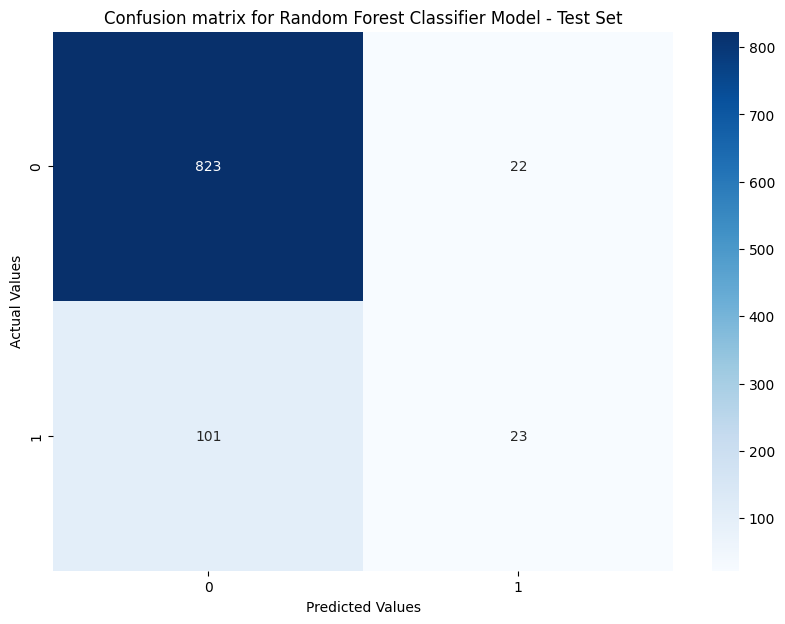

In [ ]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm_tfidf[0], annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

    negative       0.51      0.19      0.27       124
     neutral       0.68      0.96      0.80       582
    positive       0.66      0.25      0.36       263

    accuracy                           0.67       969
   macro avg       0.62      0.46      0.48       969
weighted avg       0.65      0.67      0.61       969



In [ ]:
# Creating a confusion matrix for training set
y_train_pred_tfidf = classifier_tfidf.predict(X_train_tfidf)
cm_tfidf = multilabel_confusion_matrix(y_train_tfidf, y_train_pred_tfidf)
cm_tfidf

array([[[3371,   25],
        [ 276,  204]],

       [[ 614,  966],
        [  39, 2257]],

       [[2720,   56],
        [ 732,  368]]])

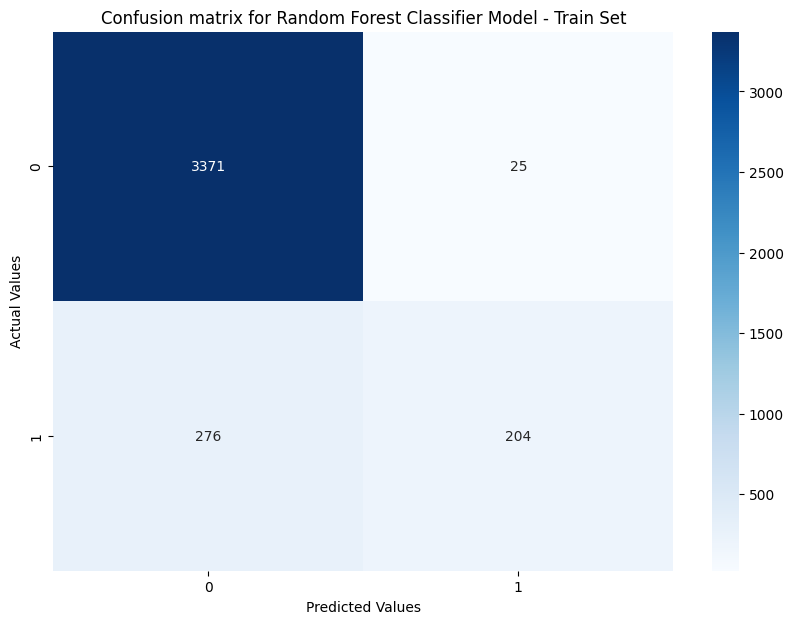

In [ ]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm_tfidf[0], annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

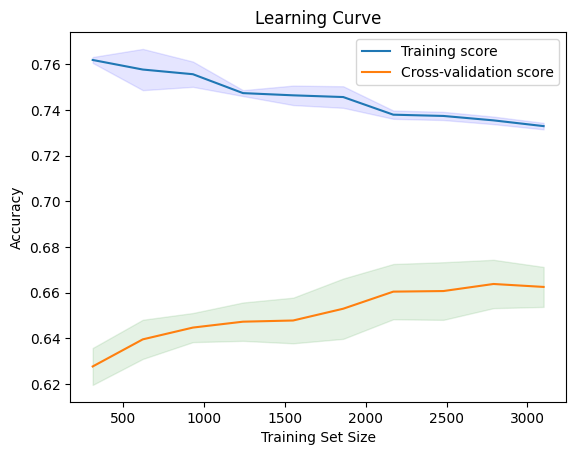

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    classifier_tfidf, X_train_tfidf, y_train_tfidf, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
score = round(accuracy_score(y_train_tfidf, y_train_pred_tfidf),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 72.99%


In [ ]:
# Classification Report
print(classification_report(y_train_tfidf, y_train_pred_tfidf))

              precision    recall  f1-score   support

    negative       0.89      0.42      0.58       480
     neutral       0.70      0.98      0.82      2296
    positive       0.87      0.33      0.48      1100

    accuracy                           0.73      3876
   macro avg       0.82      0.58      0.63      3876
weighted avg       0.77      0.73      0.69      3876



### word2vec Model Evaluation

#Doc2vec Model Evaluation

### Prediction

In [ ]:
import numpy as np
import re
# Function to preprocess and convert a sentence to Word2Vec representation
def preprocess_and_convert_to_tfidf(sentence, word2vec_model):
    # Step 1: Remove special characters and keep only alphanumeric and spaces
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Step 2: Convert to lowercase
    sentence = sentence.lower()

    # Step 3: Tokenize the sentence
    tokens = sentence.split()  # Simple tokenization by splitting on spaces

    # Step 4: Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Step 6: Convert tokens back to a sentence for TF-IDF transformation
    processed_sentence = ' '.join(tokens)

# Step 7: Convert the sentence to a TF-IDF vector using the trained TF-IDF vectorizer
# Assuming 'tfidf' is the trained TF-IDF vectorizer used during model training
    tfidf_vector = tfidf.transform([processed_sentence]).toarray()

    return tfidf_vector

# Example input sentence
new_sen_neg = input('Enter your Message and get predicted : ').strip()

# Convert the new sentence to Word2Vec vector
new_sen_neg_vector = preprocess_and_convert_to_tfidf(new_sen_neg, tfidf)  # Assuming word2vec_model exists

# Reshape the vector to fit the model's expected input shape
new_sen_neg_vector = new_sen_neg_vector

# Predict sentiment using the trained logistic regression model
predicted_sentiment = classifier_tfidf.predict(new_sen_neg_vector)


# Print the predicted sentiment (1 for positive, 0 for neutral, -1 for negative)
print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Enter your Message and get predicted : The NDA governemt came into rule concerns in mstcl company future loss
Predicted Sentiment for the new sentence: neutral


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier_tfidf, X_train_tfidf, y_train_tfidf, cv=5)

# Print cross-validation scores and their average
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

In [ ]:
!pip install Flask flask-ngrok

In [ ]:
import pickle

# Assuming `model` is your trained machine learning model
model_filename = 'sentiment_model_.pkl'

# Save the model as a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(classifier_tfidf, file)

print(f"Model saved as {model_filename}")

In [ ]:
import pickle

# Assuming `model` is your trained machine learning model
model_filename = 'tfidf_transformer.pkl'

# Save the model as a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(tfidf, file)

print(f"Model saved as {model_filename}")

In [ ]:
from flask import Flask, request, jsonify, render_template
import joblib
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


def preprocess_and_convert_to_tfidf(model,sentence):
    tfidf_vector = tfidf.transform([sentence]).toarray()

    return tfidf_vector


# Create Flask app
app = Flask(__name__)

# Load the pickle model
model = joblib.load('/content/sentiment_model_.pkl')

# Load the TFIDF vectorizer
tfidf = joblib.load('/content/tfidf_transformer.pkl')

# http://127.0.0.1:5000/
@app.route("/")
def home():
    return render_template("/content/index (2).html")

# Define a route for the prediction endpoint
@app.route('/predict', methods=["POST"])
def text_data_cleaning(sentence):
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Step 2: Convert to lowercase
    sentence = sentence.lower()

    # Step 3: Tokenize the sentence
    tokens = sentence.split()  # Simple tokenization by splitting on spaces

    # Step 4: Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Step 6: Convert tokens back to a sentence for TF-IDF transformation
    processed_sentence = ' '.join(tokens)
    return processed_sentence

def predict():
    review = request.form['Review']  # Get the review from the form
    data_pred = pd.DataFrame([review], columns=['review'])
    data_pred = text_data_cleaning(data_pred)
    data_pred_matrix = preprocess_and_convert_to_tfidf(tfidf, data_pred)

    prediction = model.predict(data_pred_matrix)

    # Convert the prediction to sentiment labels
    sentiment = "positive" if prediction[0] == 1 else "negative"

    return render_template("index (2).html", prediction_text="The sentiment is {}".format(sentiment))

# Define a route for the API based prediction endpoint
@app.route('/sentiment', methods=["GET"])
#http://127.0.0.1:5000/sentiment?Review="nice movie"

def sentiment():
    review = request.args.get("Review")  # Get the review from the argument
    data_pred = pd.DataFrame([review], columns=['review'])
    data_pred = text_data_cleaning(data_pred)
    data_pred_matrix = preprocess_and_convert_to_tfidf(tfidf, data_pred)

    prediction = model.predict(data_pred_matrix)

    # Convert the prediction to sentiment labels
    sentiment = "positive" if prediction[0] == 1 else "negative"

    prediction_text = "The sentiment is {}".format(sentiment)
    return jsonify(prediction_text)


# Run the app if executed directly
if __name__ == "__main__":
    app.run()